In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Tareq-BD/ECGR-5105/main/D3.csv')

In [4]:
X1 = df.values[:, 0]                # get input value from first column as Variable 1
X2 = df.values[:, 1]                # get input value from second column as Variable 2
X3 = df.values[:, 2]                # get input value from third column as Variable 3
y = df.values[:, 3]                 # get output value from fourth column
m = len(y)
print('X1 = ', X1[: 5]) 
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('m = ', m)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [5]:
X_0 = np.ones((m, 1))             # Creating a matrix of single column of ones as X0
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
# Converting 1D arrays of X1, X2 and X3 to 2D arrays

X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])

X_1 =  [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]
X_2 =  [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]
X_3 =  [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [7]:
# Stacking X_0, X_1, X_2 and X_3 horizotally
# This is the final X Matrix

X = np.hstack((X_0, X_1, X_2, X_3))
X [: 5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [8]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [9]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [10]:
# defining function for gradient descent algorithm

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [11]:
cost = compute_cost(X, y, theta)
cost

5.524438459196242

In [12]:
# We need theta parameter for every input variable. since we have four input variable including X_0 (column of ones)
theta = [0., 0., 0., 0.]
iterations = 2000;
alpha = 0.1

In [13]:
# Computing final theta values and cost history

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)

Final value of theta= [ 5.31416716 -2.00371927  0.53256334 -0.26560186]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


Text(0.5, 1.0, 'Convergence of gradient descent')

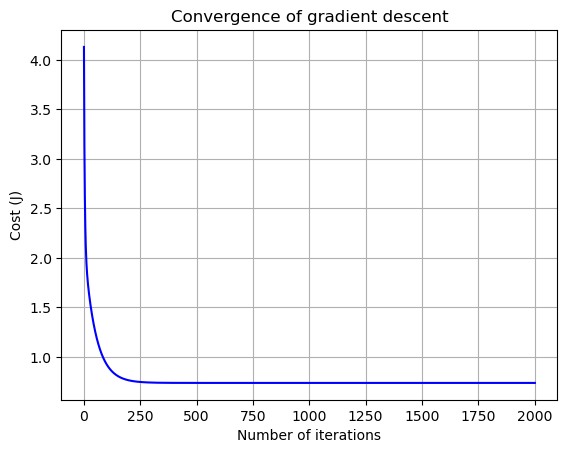

In [14]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [15]:
# Predicting outputs for new X1, X2 and X3 values

X_new = ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])

Predictions_new = np.dot(X_new, theta)
Predictions_new

array([3.57740937, 0.24432117, 0.10253417])

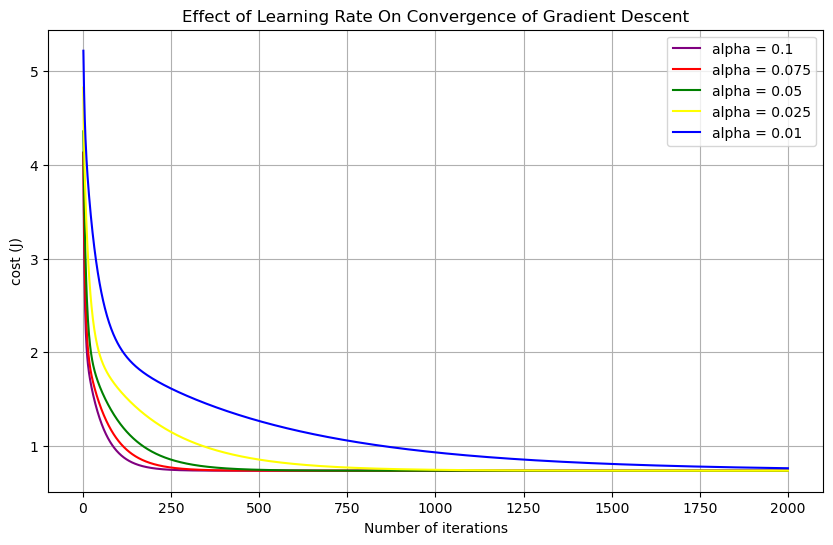

In [16]:
iterations = 2000;
theta = np.zeros(4)

alpha = 0.1;
theta_1, cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.075;
theta_2, cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.05;
theta_3, cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.025;
theta_4, cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.01;
theta_5, cost_history_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.1')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.075')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.05')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.025')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.01')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()